In [80]:
import cv2
from tflite_support.task import core
from tflite_support.task import processor
from tflite_support.task import vision
import utils
import time
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
model = 'efficientdet_lite0.tflite'
width = 640
height = 480
threads = 4
enableTPU = False

## Loading Model

In [101]:
labels = ['stop sign', 'traffic cone', 'traffic light']
base_options = core.BaseOptions(
      file_name=model, use_coral=enableTPU, num_threads=threads)
detection_options = processor.DetectionOptions(
      max_results=3, score_threshold=0.4)#, category_name_allowlist=labels)
options = vision.ObjectDetectorOptions(
      base_options=base_options, detection_options=detection_options)
detector = vision.ObjectDetector.create_from_options(options)

## Taking a picture

In [132]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360)

timers = []

start = time.time()
for i in range(1):
    timer = []
    i1 = time.time()
    success, image = cap.read()
    i2 = time.time()
    timer.append(i2-i1)
#     image = cv2.flip(image, 1)
    i3 = time.time()
    timer.append(i3-i2)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    i4 = time.time()
    timer.append(i4-i3)
    input_tensor = vision.TensorImage.create_from_array(rgb_image)
    i5 = time.time()
    timer.append(i5-i4)
    detection_result = detector.detect(input_tensor)
    i6 = time.time()
    timer.append(i6-i5)
    detects = [d.categories[0].category_name for d in detection_result.detections]
    timers.append(np.array(timer))
    
end = time.time()
cap.release()

In [125]:
print("image capturing time:", np.array(timers).T[0].mean())
print("image flipping time:", np.array(timers).T[1].mean())
print("image converting time:", np.array(timers).T[2].mean())
print("image tensoring time:", np.array(timers).T[3].mean())
print("image predicting time:", np.array(timers).T[4].mean())

image capturing time: 0.4155597686767578
image flipping time: 1.0967254638671875e-05
image converting time: 0.00263214111328125
image tensoring time: 0.00026106834411621094
image predicting time: 0.17625212669372559


In [97]:
print("image capturing time:", np.array(timers).T[0].mean())
print("image flipping time:", np.array(timers).T[1].mean())
print("image converting time:", np.array(timers).T[2].mean())
print("image tensoring time:", np.array(timers).T[3].mean())
print("image predicting time:", np.array(timers).T[4].mean())

image capturing time: 0.009244627952575683
image flipping time: 0.0013558578491210938
image converting time: 0.0011949920654296875
image tensoring time: 0.00021803855895996093
image predicting time: 0.17074103355407716


In [110]:
fps = 50/(end-start)
fps


5.372966090945246

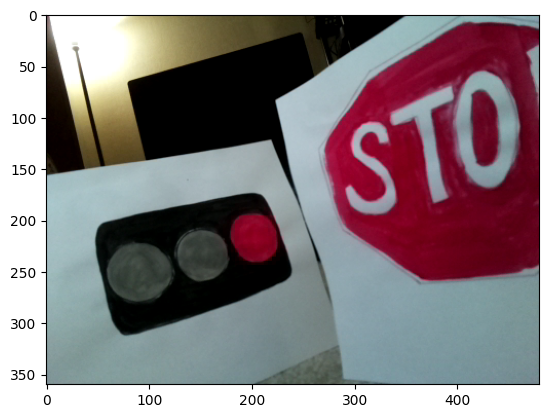

In [133]:
plt.imshow(rgb_image)
plt.show()

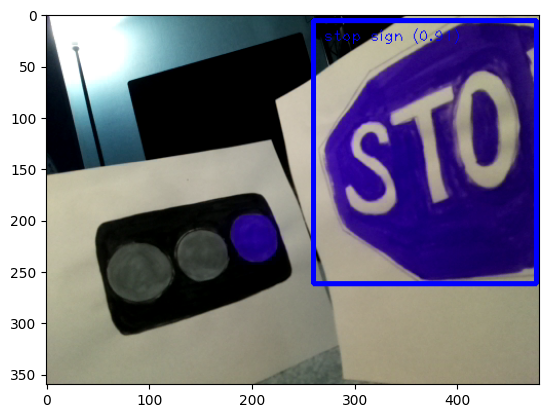

In [134]:
# Run object detection estimation using the model.
detection_result = detector.detect(input_tensor)

# Draw keypoints and edges on input image
image = utils.visualize(image, detection_result)

plt.imshow(image)
plt.show()

['laptop']

In [98]:
detection_result.detections[0].categories[0].category_name

'stop sign'

In [131]:
detection_result

DetectionResult(detections=[])